<h1>Telco Customer Churn - Exploratory Data Analysis

In [2]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

<h2>Loading Dataset

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<h2>Data Cleaning

In [7]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
#Handling Missing Values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print("Missing values after:", df['TotalCharges'].isna().sum())

Missing values after: 0


In [12]:
#Dropping Customer ID
df.drop('customerID', axis=1, inplace=True)

In [13]:
#Convert Binary Columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

label_encoder = LabelEncoder()

for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [15]:
# Convert SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


<h2>Visualizations

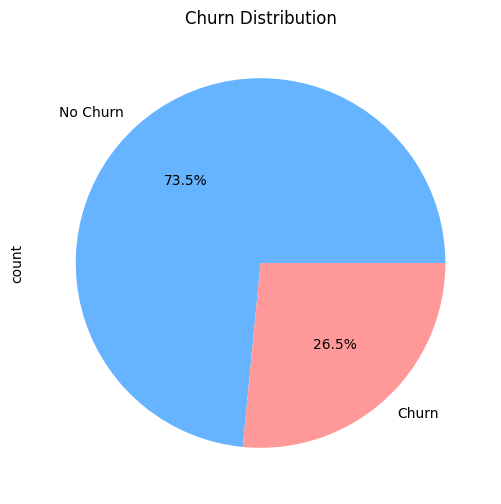

In [25]:
#Plot 1: Churn Distribution

plt.figure(figsize=(6,6))

df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', 
                                  colors=['#66b3ff','#ff9999'],
                                  labels=['No Churn', 'Churn'])
plt.title('Churn Distribution')
plt.show()

As we can see here, we are dealing with an **imbalanced dataset**. The classes vastly differ in frequency.

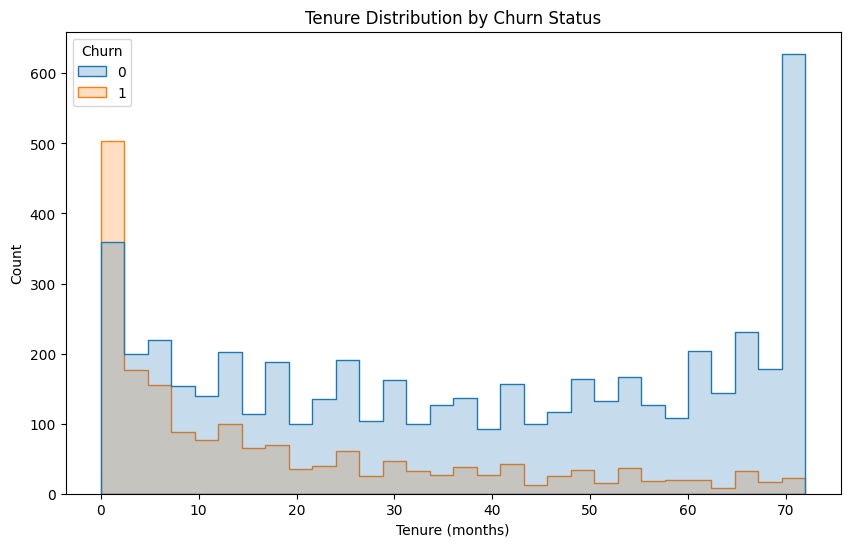

In [26]:
# Plot 2: Tenure Distribution by Churn
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', element='step', bins=30)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (months)')
plt.show()

We can say by looking at this plot, that as tenure tends to increase the chance of churn are vastly reduced.

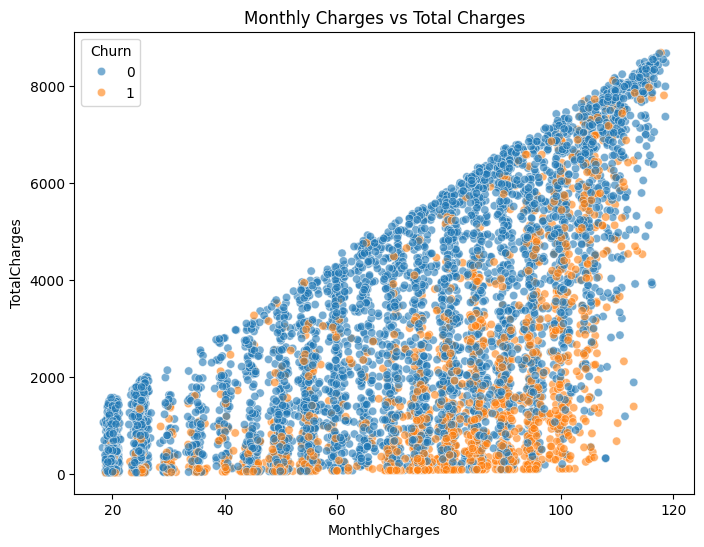

In [27]:
#Plot 3: Monthly Charges vs Total Charges
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.6)
plt.title('Monthly Charges vs Total Charges')
plt.show()

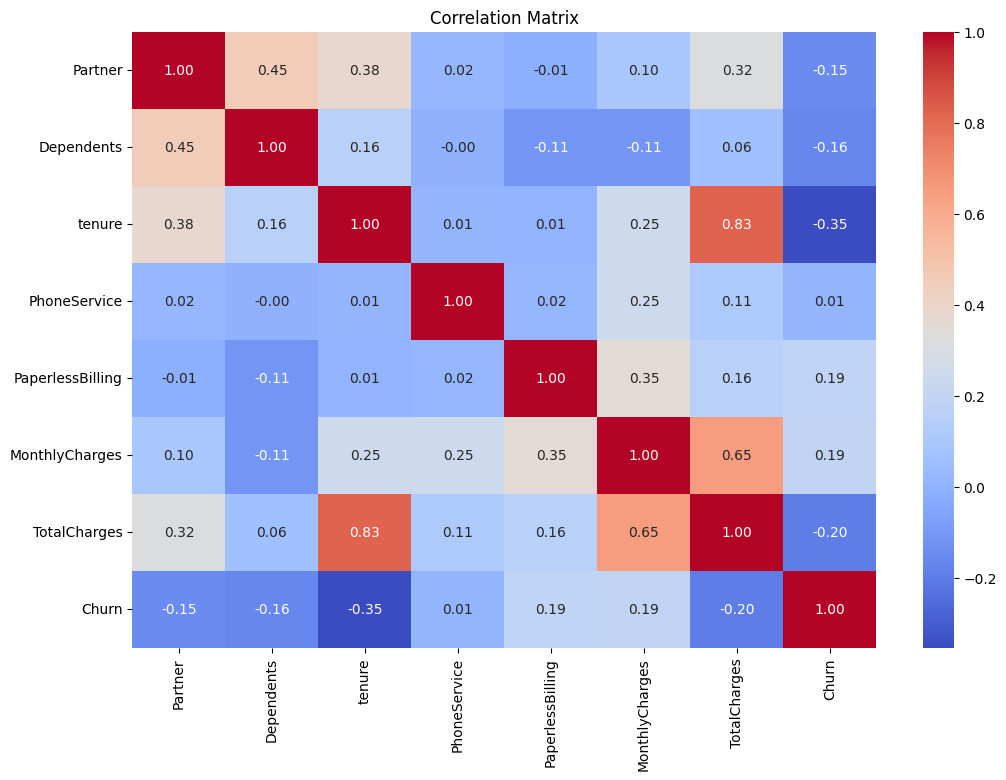

In [28]:
#Plot 4: Correlation Matrix
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

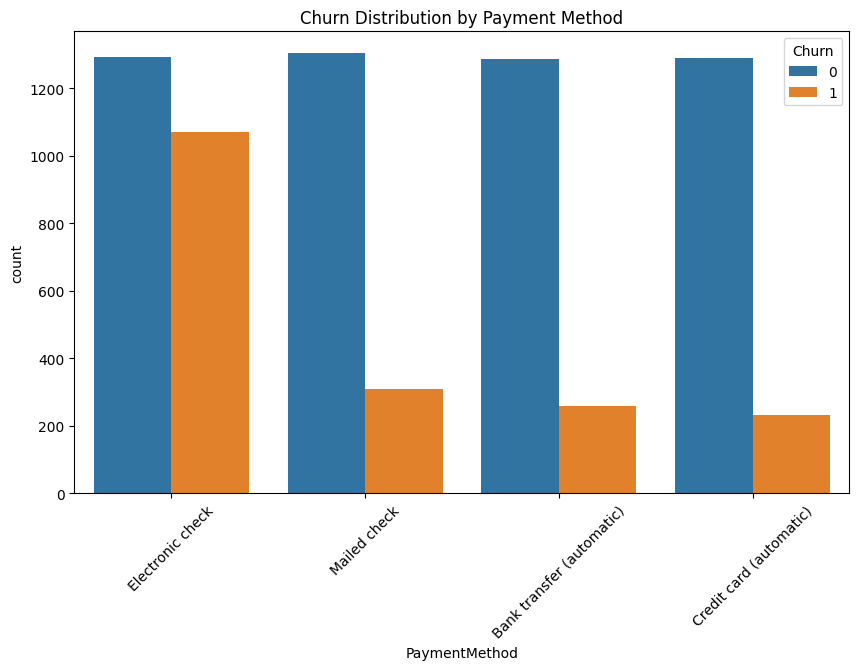

In [29]:
# Plot 5: Payment Method Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn Distribution by Payment Method')
plt.xticks(rotation=45)
plt.show()

Highest churn recorded for Electronic Check payment method. Even though I am not sure why :)

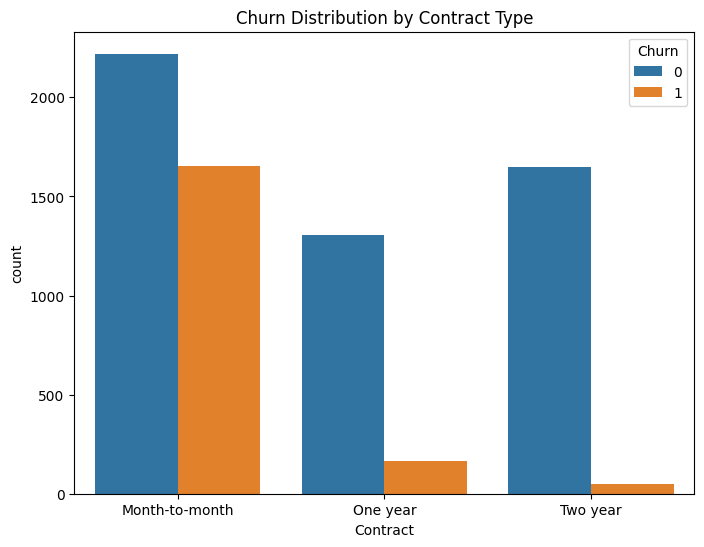

In [31]:
# Plot 6: Contract Type Impact
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Contract', hue='Churn', order=['Month-to-month', 'One year', 'Two year'])
plt.title('Churn Distribution by Contract Type')
plt.show()

Month-to-month contract users tend to leave more when compared to contracts with more that a year

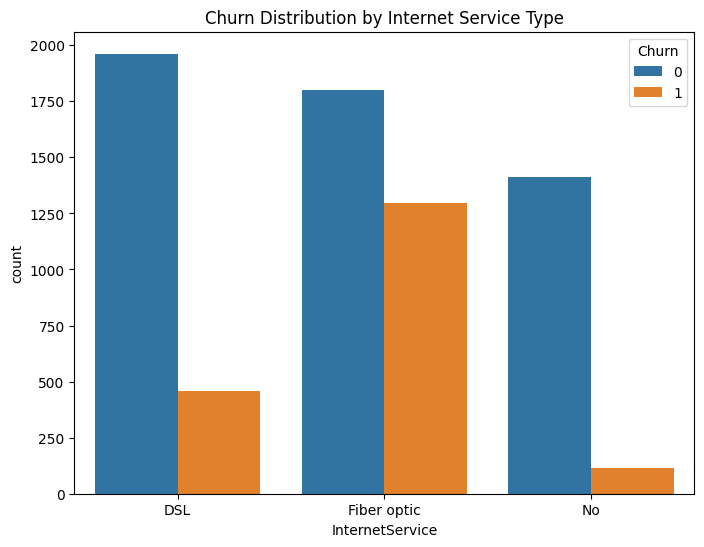

In [32]:
# Plot 7: Internet Service Type
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Distribution by Internet Service Type')
plt.show()

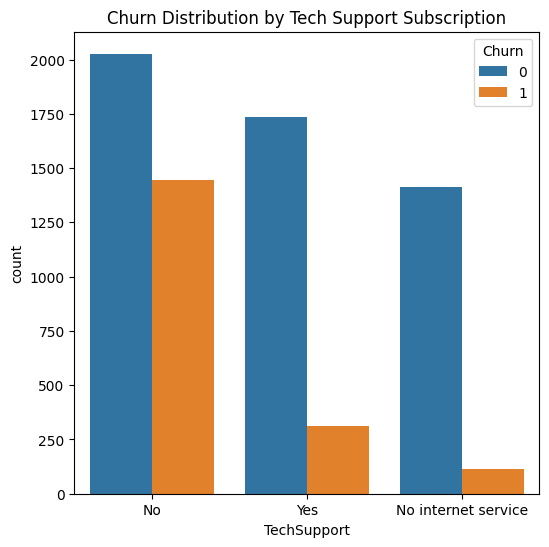

In [33]:
# Plot 8: Tech Support Impact
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='TechSupport', hue='Churn', order=['No', 'Yes', 'No internet service'])
plt.title('Churn Distribution by Tech Support Subscription')
plt.show()

We can clearly see the impact Tech Support creates in retaining the customers

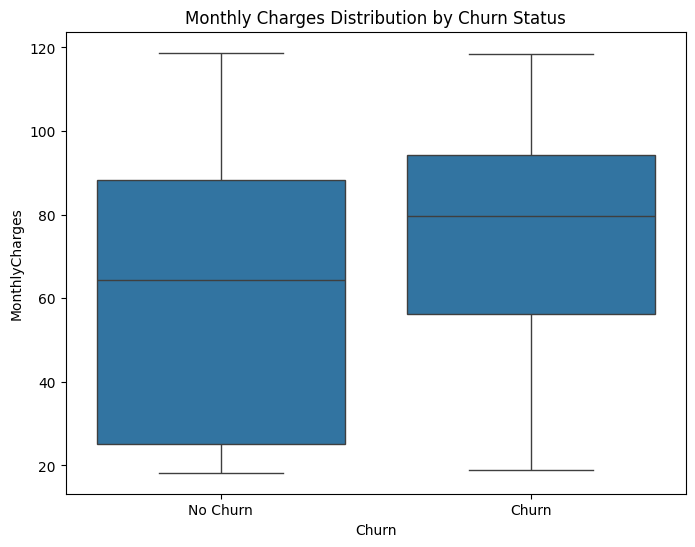

In [34]:
# Plot 9: Boxplot of Monthly Charges by Churn
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.show()

The median value of Monthly Charges is higher for Churn when compared to No Churn

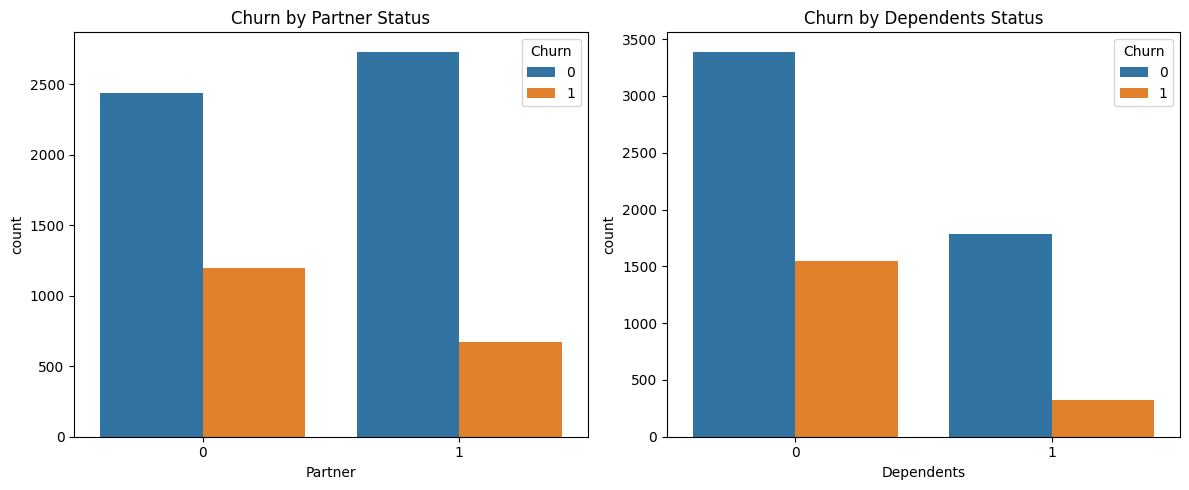

In [35]:
# Plot 10: Partner/Dependents Impact
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0])
sns.countplot(data=df, x='Dependents', hue='Churn', ax=ax[1])
ax[0].set_title('Churn by Partner Status')
ax[1].set_title('Churn by Dependents Status')
plt.tight_layout()
plt.show()

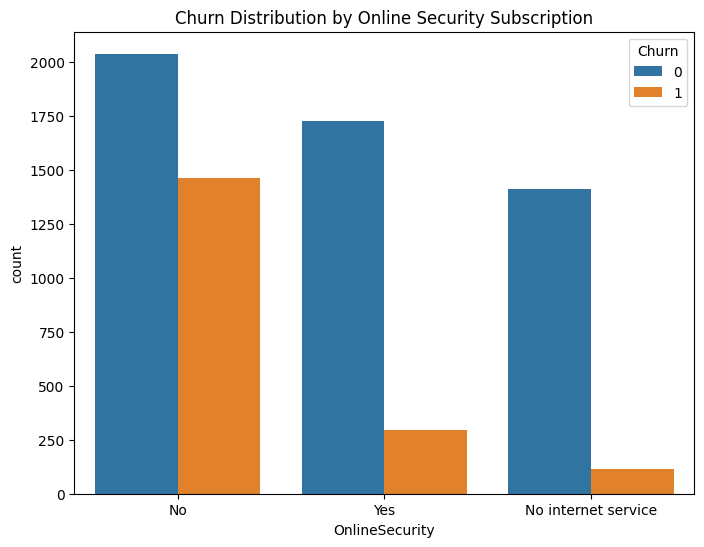

In [36]:
# Plot 11: Online Security Impact
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', order=['No', 'Yes', 'No internet service'])
plt.title('Churn Distribution by Online Security Subscription')
plt.show()

In [39]:
# Save cleaned data
df.to_csv('cleaned_churn_data.csv', index=False)